# A little bit about distribution

In [1]:
import matplotlib.pyplot as plt

from shuffler import Shuffler, DEFAULT_ENCODING

TICKETS_COUNT = 25
shuffler = Shuffler(number_of_tickets=TICKETS_COUNT, distribution_parameter=10)

In the file `../data/students.txt` it contains 16536 lines with surnames and first names.

In [2]:
with open('../data/students.txt', mode='r', encoding=DEFAULT_ENCODING) as students_list:
    students = [item.split() for item in students_list]
students_count = len(students)

Let's run the shuffler on the provided data.

In [3]:
import pandas as pd
from typing import Iterable


def get_dataframe_with_tickets(shuffler: Shuffler, list_of_students: Iterable) -> pd.DataFrame:
    return pd.DataFrame(
        columns=['first_name', 'last_name', 'ticket'],
        data=shuffler.get_tickets_of_students(list_of_students),
    )


distribution = get_dataframe_with_tickets(shuffler, students)

Consider a histogram with tickets. It is expected that on a sufficiently large data set, the distribution will be close to uniform: this means that _the bars of the histogram will be approximately equal_.

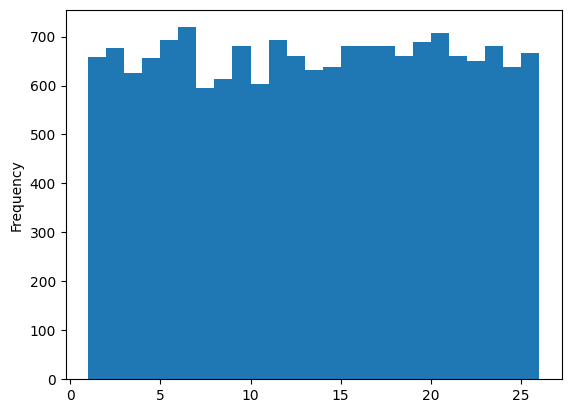

In [4]:
distribution.ticket.plot.hist(range=(1, TICKETS_COUNT + 1), bins=TICKETS_COUNT);

Thus, the hypothesis is confirmed: the distribution of tickets is close to uniform.

# As for determinism

In [5]:
subset = [
    ['Айзана', 'Трещетенкова'],
    ['Сарика', 'Поствайкина'],
    ['Иосипина', 'Шелуханов'],
    ['Зимра', 'Лоева'],
    ['Дидбан', 'Грандберг'],
]

re_distributed = get_dataframe_with_tickets(shuffler, subset)
re_distributed

,first_name,last_name,ticket
0,Айзана,Трещетенкова,25
1,Сарика,Поствайкина,12
2,Иосипина,Шелуханов,14
3,Зимра,Лоева,22
4,Дидбан,Грандберг,5


In [6]:
from functools import reduce


def get_mask(first_name: str, last_name: str):
    return (distribution.first_name == first_name) & (distribution.last_name == last_name)


mask = reduce(lambda acc, names: acc | get_mask(*names), subset, False)
distribution[mask].reset_index(drop=True)

,first_name,last_name,ticket
0,Айзана,Трещетенкова,25
1,Сарика,Поствайкина,12
2,Иосипина,Шелуханов,14
3,Зимра,Лоева,22
4,Дидбан,Грандберг,5


Thus, it can be seen that with the name and distribution parameter unchanged, the distribution doesn't change.

# In conclusion about randomness

Change the distribution parameter.

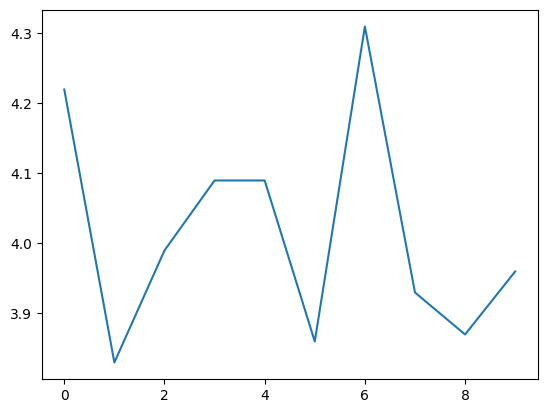

In [7]:
def get_tickets(parameter: int) -> pd.DataFrame:
    return get_dataframe_with_tickets(
        Shuffler(
            number_of_tickets=TICKETS_COUNT,
            distribution_parameter=parameter
        ),
        students
    ).ticket


def get_number_of_matches(parameter: int) -> int:
    return len(distribution[get_tickets(parameter) == distribution.ticket])


def get_percentage_of_matches(parameter: int) -> float:
    return round(get_number_of_matches(parameter) / students_count * 100, 2)


parameters = range(10)
plt.plot(parameters, [get_percentage_of_matches(parameter) for parameter in parameters]);

Thus, it can be seen that with a small number of tickets, after changing the distribution parameter, the ticket does not change for less than 5% of students. In other words, when the parameter changes, the distribution "changes a lot". This proof is not formal, but in fact it is a good heuristic.